# Import Libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.colors import ListedColormap
plt.style.use('ggplot')

# Load and Visualize Dat

In [5]:
df = pd.read_csv('datasets/neural-data.csv')
df.head()

,x1,x2,label
0,0.39,0.00,0
1,1.29,0.00,0
2,1.33,-0.03,0
3,1.59,-0.05,0
4,1.79,-0.03,0


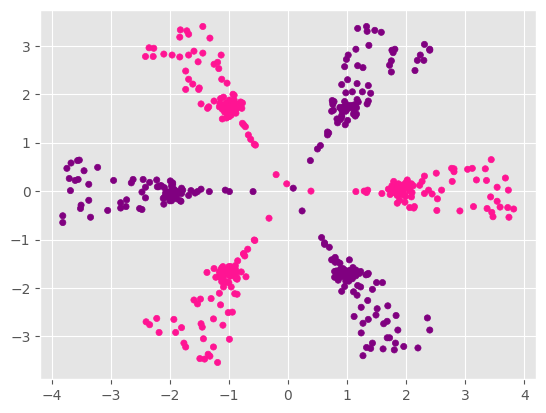

In [6]:
plt.scatter(df["x1"], df["x2"], c=df["label"], cmap=ListedColormap(["deeppink", "purple"]), s=20)
plt.show()

In [7]:
X = df.drop("label", axis=1).values
y = df["label"].values

In [8]:
print(f"X.shape: {X.shape}")
print(f"y.shape: {y.shape}")

X.shape: (500, 2)
y.shape: (500,)


# Helper Functions

In [10]:
def initialize_parameters(input_neurons, hidden_neurons, output_neurons):
    np.random.seed(42)
    W1 = np.random.randn(input_neurons, hidden_neurons)
    b1 = np.zeros((1, hidden_neurons))
    W2 = np.random.randn(hidden_neurons, output_neurons)
    b2 = np.zeros((1, output_neurons))
    return W1, b1, W2, b2

In [11]:
# Let's Visualize an example
initialize_parameters(2,4,1) 

(array([[ 0.49671415, -0.1382643 ,  0.64768854,  1.52302986],
        [-0.23415337, -0.23413696,  1.57921282,  0.76743473]]),
 array([[0., 0., 0., 0.]]),
 array([[-0.46947439],
        [ 0.54256004],
        [-0.46341769],
        [-0.46572975]]),
 array([[0.]]))

# Activations and Derivative function

In [20]:
def sigmoid(z):
    a = 1 / (1 + np.exp(-z))
    return a

def sigmoid_derivative(A):
    return A * (1 - A)

# We need not Implement `tanh` function as it comes built-in with numpy

def tanh_derivative(a):
    return 1 - np.power(a, 2)

# Forward Propagation

In [17]:
def forward_pass(X, W1, b1, W2, b2):
    Z1 = np.dot(X, W1) + b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(A1, W2) + b2
    A2 = sigmoid(Z2)
    return Z1, A1, Z2, A2

# Compute Loss

In [ ]:
def compute_loss(y, A2):
    return np.mean((y - A2) ** 2)

# Backward Pass

In [18]:
def backward_pass(X, y, Z1, A1, A2, W2):
    m = X.shape[0]
    dA2 = A2 - y
    dZ2 = dA2 * sigmoid_derivative(A2)
    dW2 = np.dot(A1.T, dZ2) / m
    db2 = np.sum(dZ2, axis=0, keepdims=True) / m

    dA1 = np.dot(dZ2, W2.T)
    dZ1 = dA1 * tanh_derivative(A1)
    dW1 = np.dot(X.T, dZ1) / m
    db1 = np.sum(dZ1, axis=0, keepdims=True) / m

    return dW1, db1, dW2, db2

# Update Parameters

In [19]:
def update_parameters(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate):
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2
    return W1, b1, W2, b2